In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
from matplotlib import cm
% matplotlib inline

## Myers-Briggs Testament Indicator Analysis
* Dataset: This is an analysis of my personal dataset of people that I have encountered and typed
* Goal: To understand the people that I work well with and to find anomalies in my dataset compared with the normal distribution of MBTI Types

In [2]:
df = pd.read_csv('MBTI.csv')

### Exploring the dataset

In [4]:
#aggregating the responses by MBTI type & creating a new dataframe
type_distribution = df.groupby('MBTI Type').count().reset_index()

In [5]:
#creating a new dataframe with 2 columns
personal_count_of_type_dist = type_distribution['First Name']

In [84]:
#setting a color palette with 16 colors
sns.set_palette(sns.color_palette("Paired", n_colors= 16))

''

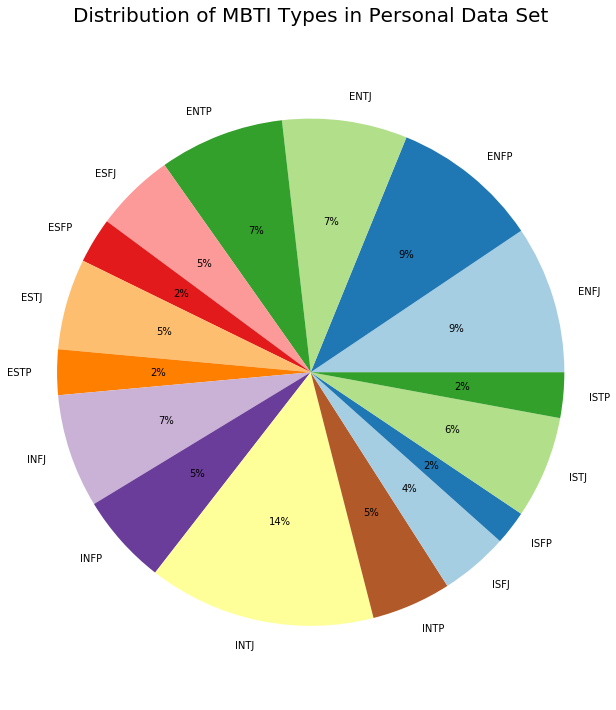

In [85]:
fig = plt.gcf()
fig.set_size_inches(10, 12)
plt.pie(x=personal_count_of_type_dist, labels=type_distribution['MBTI Type'], autopct='%i%%')
plt.title("Distribution of MBTI Types in Personal Data Set", fontsize=20, y=1.03)
plt.axis('equal')  
;

Finding:  INTJs are the most common type in my data set

In [56]:
##Comparing this to US distribution is of MBTI types from 16personalities.com

In [9]:
#data taken from 16personalities.com
mbti_types = ['ENFJ', 'ENFP', 'ENTJ','ENTP',
              'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
              'INFJ', 'INFP', 'INTJ', 'INTP',
              'ISFJ', 'ISFP', 'ISTJ', 'ISTP']
normal_mbti_type_dist = [4.25, 8.92, 1.80, 3.56,
                        14.09, 8.73, 6.37, 3.89,
                        4.47, 8.33, 2.18, 3.76, 
                        12.31, 7.77, 5.83, 3.74]

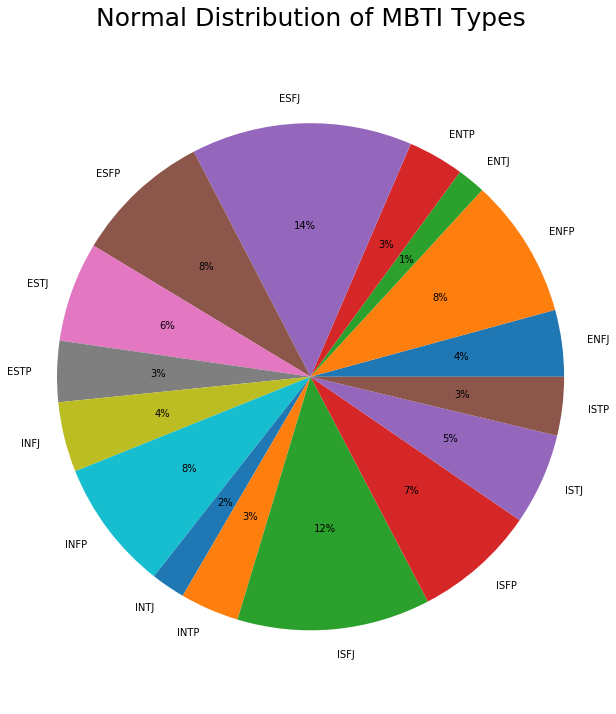

<Figure size 1296x720 with 0 Axes>

In [11]:
fig = plt.gcf()
fig.set_size_inches(10, 12)
plt.pie(x=normal_mbti_type_dist, labels=mbti_types,autopct='%i%%')
plt.title("Normal Distribution of MBTI Types", fontsize=25, y=1.03)
plt.axis('equal')  
plt.figure(figsize=(18, 10));

Finding: INTJs are the second rarest type in the US

### Making a grouped bar chart to compare the two pie charts above

In [91]:
#creating a new df with 1 column
personal_count_of_type_dist = type_distribution['First Name']

In [92]:
#calculating total number of datapoints 
total_number_of_respondents = [personal_count_of_type_dist.sum()]

In [93]:
#finding the percent of each MBTI type in my dataset
percent_type_distribution = personal_count_of_type_dist/total_number_of_respondents * 100

In [218]:
#preparing the data for plotting
df2 = pd.DataFrame({'MBTI_Type': mbti_types,
                   'US distribution': normal_mbti_type_dist,
                   'personal distribution':percent_type_distribution})

In [219]:
#sorting values to make interpreting data easier
df_ordered = df2.sort_values('US distribution', ascending=False)

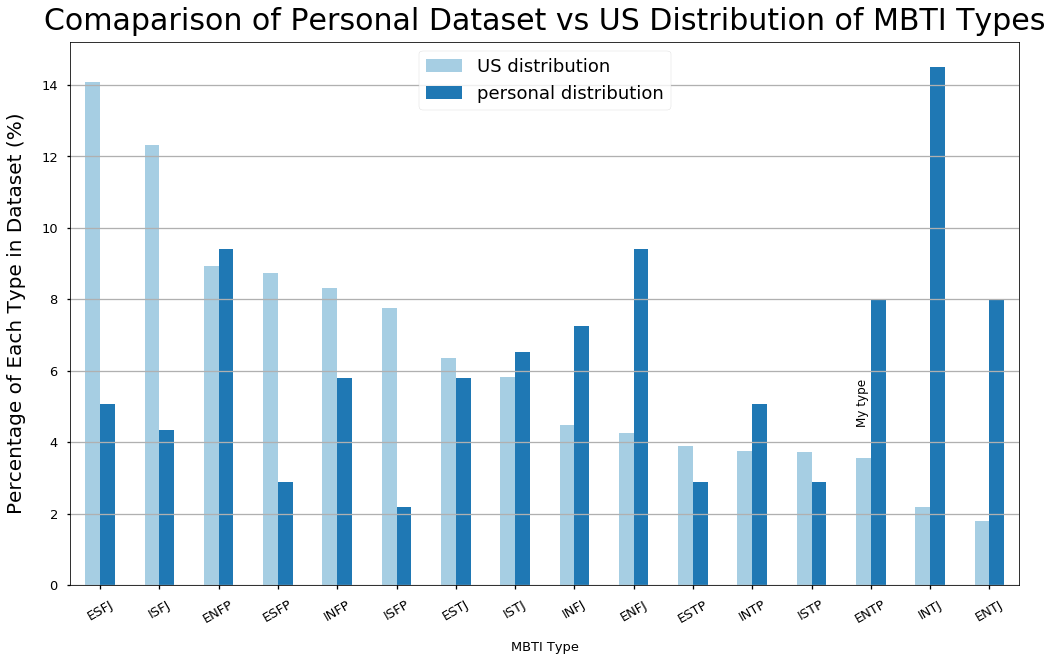

In [213]:
df_ordered.set_index('MBTI_Type')[[
    'US distribution','personal distribution']].plot(
    kind='bar', figsize=(17, 10))
plt.xticks(rotation=30)
plt.title(
    "Comaparison of Personal Dataset vs US Distribution of MBTI Types",
    fontsize=30, y=1.01
)
plt.xlabel("MBTI Type", fontsize=13, labelpad=15)
plt.ylabel("Percentage of Each Type in Dataset (%)", fontsize=20, labelpad=15)
plt.legend(fontsize=18)
plt.grid(axis='y')
plt.text(12.75, 5.5, 'My type', fontsize=12, rotation=90)
plt.show();

Finding 1: My dataset follows a completely different distribution compared to the normal distribution of MBTI types in the US

Finding 2: There are at least twice as many INTJs, ENTJs, ENTPs, and ENFJs in my dataset vs the normal

### Hypothesis: Maybe I am closer to INTJs, ENTJs, ENTPs and ENFJs; therefore naturally, I will have more of these types in my dataset

In [220]:
#preparing data for plotting
closeness_per_type = df.groupby('MBTI Type')['Closeness rating'].mean()
closeness_per_type= closeness_per_type.to_frame()

In [221]:
#sorting values to help interpretation
df_order = closeness_per_type.sort_values('Closeness rating').reset_index()

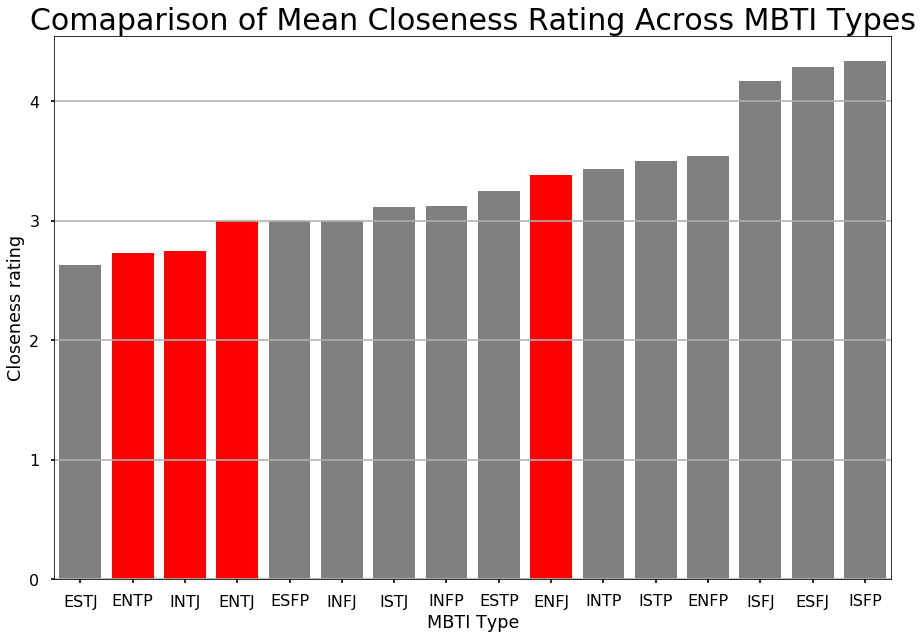

In [223]:
plt.figure(figsize=(15, 10))
sns.set_context("poster")
ax2 = sns.barplot(x='MBTI Type', y='Closeness rating',data=df_order, color='grey', ci=None)
ax2.axes.set_title("Comaparison of Mean Closeness Rating Across MBTI Types", fontsize=30)
ax2.set(xlabel='MBTI Type', ylabel='Closeness rating')
ax2.grid(b=True, which='major', axis='y')

#changing the colors of the 4 types from previous graph
for i in range(1,4):
    ax2.patches[i].set_facecolor('r')
for i in range(9,10):
    ax2.patches[i].set_facecolor('r')

Closeness rating 3 = threshold of what I would consider friends ie. we have each others phone numbers and connected on social media

Scale is 1 -> 5

Finding: With exception of the ENFJ, the three other types are at, or below by "friend" threshold.  Therefore, the anomaly in the previous graph is not explained by by closeness to these types

### Plotting period that INTJs were typed given that this is the highest occuring type while being the second rarest

In [102]:
#simplifying the dataset
df.loc[df['Relationship']=='College Friend', 'Simple Group'] = 'In College'
df.loc[df['Relationship']=='College Classmate', 'Simple Group'] = 'In College'
df.loc[df['Relationship']=='College Acquaintance', 'Simple Group'] = 'In College'
df.loc[df['Relationship']=='Relative', 'Simple Group'] = 'After College'
df.loc[df['Relationship']=='Professor', 'Simple Group'] = 'After College'
df.loc[df['Relationship']=='High School Friend', 'Simple Group'] = 'After College'
df.loc[df['Relationship']=='Graduate Classmate', 'Simple Group'] = 'After College'
df.loc[df['Relationship']=='Graduate Acquaintance', 'Simple Group'] = 'After College'

In [127]:
#preparing the data for plotting
intj_df = df[df['MBTI Type']=='INTJ']
intj_count = intj_df.groupby('Simple Group').count().reset_index()
intj_pie = intj_count['First Name']

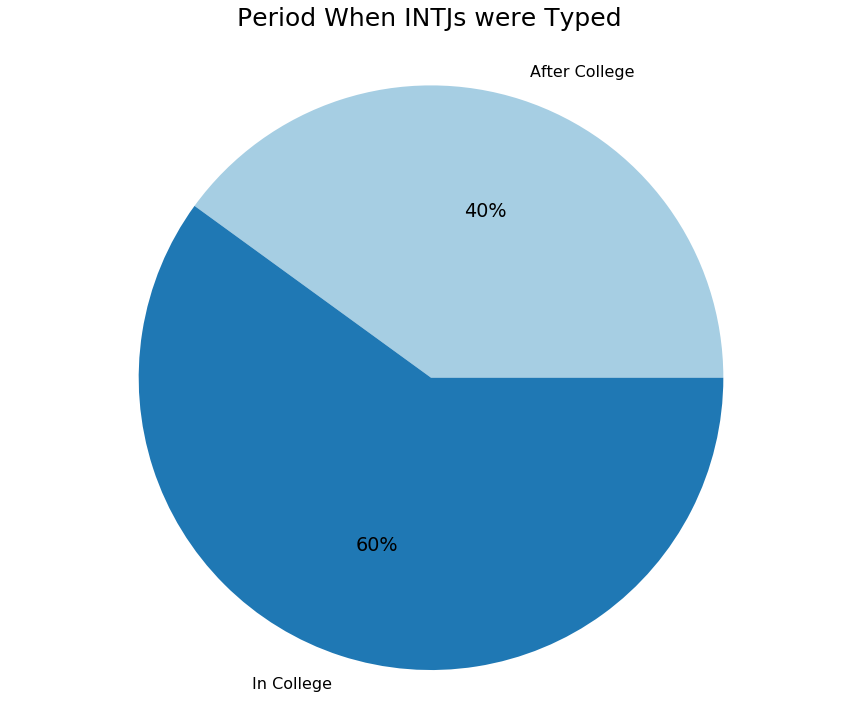

<Figure size 2520x1440 with 0 Axes>

In [131]:
fig = plt.gcf()
fig.set_size_inches(15, 12)
plt.pie(x=intj_pie, labels=intj_count['Simple Group'], autopct='%i%%')
plt.title("Period When INTJs were Typed", fontsize=25, y=1.03)
plt.axis('equal')  
plt.figure(figsize=(35, 20));

Finding: I typed most INTJs in college. This makes sense because these types are intellectually driven

## Plotting heatmap of places I meet different MBTI Types

In [139]:
#simplifying the data
df.loc[df['Place Met']=='Campus', 'Simple Place'] = 'College Campus'
df.loc[df['Place Met']=='Classroom', 'Simple Place'] = 'College Campus'
df.loc[df['Place Met']=='Dorm', 'Simple Place'] = 'College Campus'
df.loc[df['Place Met']=='Hangout', 'Simple Place'] = 'Leisure Activites'
df.loc[df['Place Met']=='Party', 'Simple Place'] = 'Leisure Activites'
df.loc[df['Place Met']=='Soccer', 'Simple Place'] = 'Leisure Activites'
df.loc[df['Place Met']=='Mountain', 'Simple Place'] = 'Leisure Activites'
df.loc[df['Place Met']=='Social', 'Simple Place'] = 'Leisure Activites'
df.loc[df['Place Met']=='Work', 'Simple Place'] = 'Work'

In [140]:
#preparing the data for plotting
df_mbti_place_count = df.groupby(['MBTI Type','Simple Place']).count().reset_index()

In [141]:
#preparing the data for plotting
df_heatmap2 = df_mbti_place_count.pivot('Simple Place', 'MBTI Type',  'First Name') 

''

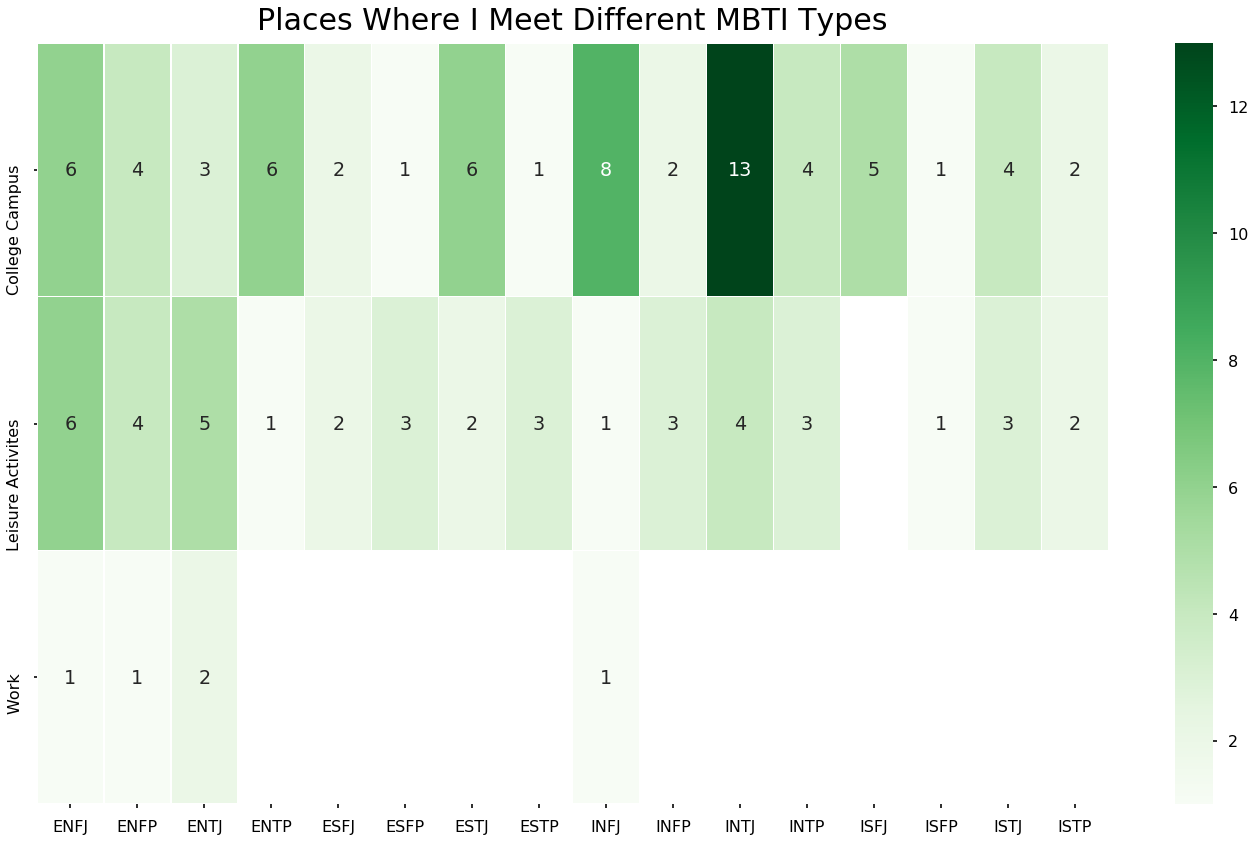

In [147]:
sns.set_context("poster")
f, ax3 = plt.subplots(figsize=(24, 14))
ax3 = sns.heatmap(df_heatmap2, annot=True, linewidths=.5, ax=ax3, cmap='Greens')
ax3.axes.set_title("Places Where I Meet Different MBTI Types", fontsize=30, y=1.01)
ax3.axes.set_ylabel('')
ax3.axes.set_xlabel('')
;

Finding 1: I meet ENFJs equally on the college campus and during leisure activities

Finding 2: I meet INFJs and INTJs significantly more often on college campuses 

### Hypothesis: I get have more synergy with NTs (Rationals) vs all other types because this is my type

In [171]:
mean_synergy_levels_per_type = df.groupby('MBTI Type')['Synergy levels'].mean()
mean_synergy_levels_per_type = mean_synergy_levels_per_type.to_frame()

In [199]:
df_order2 = mean_synergy_levels_per_type.sort_values('Synergy levels', ascending=False).reset_index()

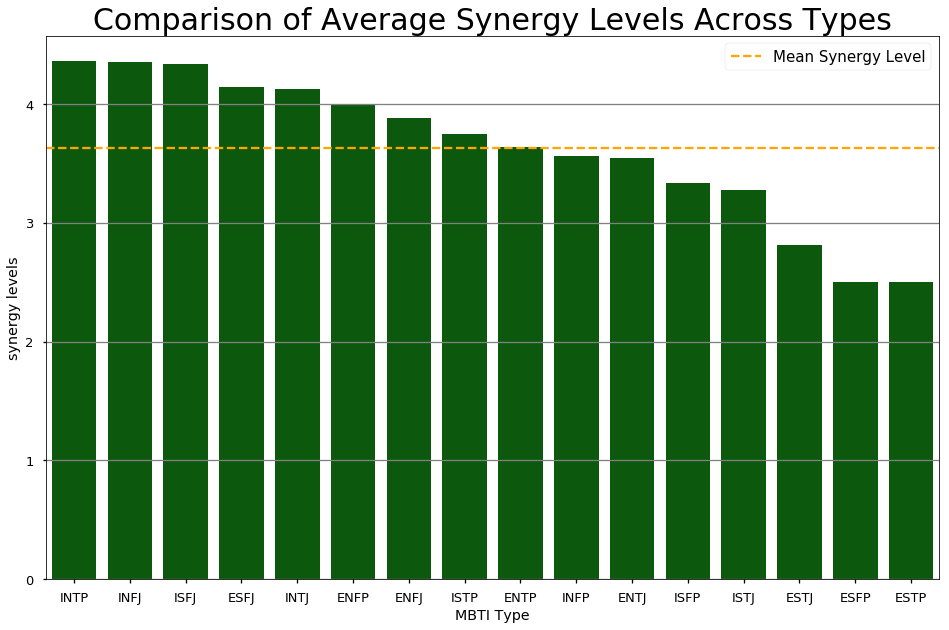

In [200]:
plt.figure(figsize=(16, 10))
sns.set_context("talk")
ax1 = sns.barplot(x='MBTI Type', y='Synergy levels',data=df_order2, color='darkgreen')
ax1.axes.set_title("Comparison of Average Synergy Levels Across Types", fontsize=30)
ax1.set(xlabel='MBTI Type', ylabel='synergy levels')
ax1.grid(b=True, which='major', axis='y', color ='grey')
ax1.axhline(y=total_mean_synergy_levels, color='orange', ls='dashed', 
            label='Mean Synergy Level')
ax1.legend( fontsize = 15)

Finding: INTPs and INTJs score high on my synergy scale. Hypothesis is half confirmed